In [1]:
import pandas as pd
import pickle
from tensorflow.keras.models import load_model
import json
import numpy as np

from plot_utils import utils as plot_utils
from models import utils as model_utils
from labels import utils as label_utils
from weights import utils as weight_utils
from backtest import utils as backtest_utils

2024-01-31 22:15:09.809679: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 22:15:09.809698: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 22:15:09.809714: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-31 22:15:09.813850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-31 22:15:10.249009: W tensorflow/compiler/

## Load Data

In [2]:
WINDOW_SIZE = 60
TRAIN = 'train'
TEST = 'test'
# RAW DATA
raw_train_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/data/raw/train_1m_2010-10-11_2012-11-06.csv", index_col=0)
raw_train_df.index = pd.to_datetime(raw_train_df.index)
raw_train_X = model_utils.get_X(raw_train_df, WINDOW_SIZE)
raw_test_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/data/raw/test_1m_2012-11-07_2012-11-20.csv", index_col=0)
raw_test_df.index = pd.to_datetime(raw_test_df.index)
raw_test_X = model_utils.get_X(raw_test_df, WINDOW_SIZE)
# FEATURED DATA
feat_train_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/data/feat/train_1m_2010-10-11_2012-11-06.csv", index_col=0)
feat_train_df.index = pd.to_datetime(feat_train_df.index)
feat_train_X = model_utils.get_X(feat_train_df, WINDOW_SIZE)
feat_test_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/data/feat/test_1m_2012-11-07_2012-11-20.csv", index_col=0)
feat_test_df.index = pd.to_datetime(feat_test_df.index)
feat_test_X = model_utils.get_X(feat_test_df, WINDOW_SIZE)
# LABELS
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/labels/all_labels_train_1m_2010-10-11_2012-11-06.pkl", 'rb') as file:
    labels_train_dict = pickle.load(file)
Y_train_dict = {}
for label_name in labels_train_dict.keys():
    Y_train_dict[label_name] = model_utils.get_Y_or_W(labels_train_dict[label_name], WINDOW_SIZE)
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/labels/all_labels_test_1m_2012-11-07_2012-11-20.pkl", 'rb') as file:
    labels_test_dict = pickle.load(file)
Y_test_dict = {}
for label_name in labels_test_dict.keys():
    Y_test_dict[label_name] = model_utils.get_Y_or_W(labels_test_dict[label_name], WINDOW_SIZE)
# WEIGHTS
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/weights/all_weights_train_1m_2010-10-11_2012-11-06.pkl", 'rb') as file:
    weights_train_dict = pickle.load(file)
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/weights/all_weights_test_1m_2012-11-07_2012-11-20.pkl", 'rb') as file:
    weights_test_dict = pickle.load(file)

## Data Presentation

In [6]:
def print_data_info(data_df):
    print(f'\tShape: {data_df.shape}')
    start_date = data_df.index[0].strftime('%Y-%m-%d %H:%M:%S')
    end_date = data_df.index[-1].strftime('%Y-%m-%d %H:%M:%S')
    print(f'\tDates from {start_date} to {end_date}')

print('RAW DATA')
print(f'\tColumns:\n\t{", ".join(raw_train_df.columns.tolist())}')

print('Raw TRAIN data')
print_data_info(raw_train_df)

print(f'Raw TEST data')
print_data_info(raw_test_df)

print('=====================================================================================================')

print('FEATURED DATA')
print(f'\tColumns:\n\t{", ".join(feat_train_df.columns.tolist())}')

print('Featured TRAIN data')
print_data_info(feat_train_df)

print(f'Featured TEST data')
print_data_info(feat_test_df)

RAW DATA
	Columns:
	Open, High, Low, Close, Volume
Raw TRAIN data
	Shape: (166268, 5)
	Dates from 2010-10-11 13:41:00 to 2012-11-06 15:59:00
Raw TEST data
	Shape: (2961, 5)
	Dates from 2012-11-07 10:31:00 to 2012-11-20 15:59:00
FEATURED DATA
	Columns:
	Open, High, Low, Close, Volume, Returns, Volatility, Max_Drawdown, Max_Drawup, Volume_Change, ADX, APO, CCI, DX, MFI, RSI, ULTOSC, WILLR, NATR, Alpha, Beta, Index_Returns, Index_Volatility, Correlation, Covariance, Beta_Direct, TF_Max_Drawdown, TF_Max_Drawup, Return_Skewness, Return_Kurtosis, Asset_To_Index_Alpha, Asset_To_Index_Beta, sin_Day_of_Week, cos_Day_of_Week, sin_Day_of_Month, cos_Day_of_Month, sin_Day_of_Year, cos_Day_of_Year, sin_time_of_day, cos_time_of_day
Featured TRAIN data
	Shape: (166268, 40)
	Dates from 2010-10-11 13:41:00 to 2012-11-06 15:59:00
Featured TEST data
	Shape: (2961, 40)
	Dates from 2012-11-07 10:31:00 to 2012-11-20 15:59:00


## Label Plots

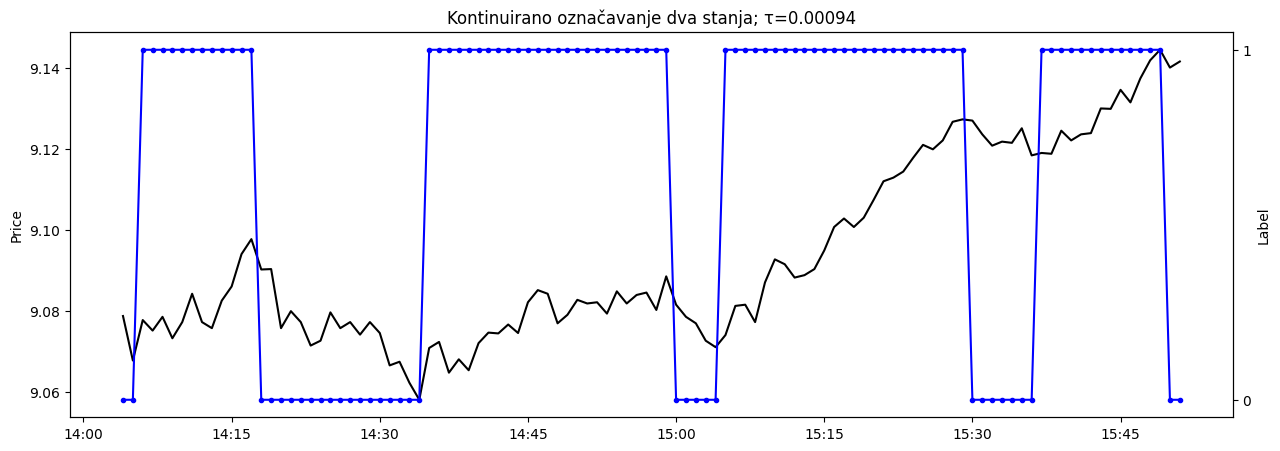

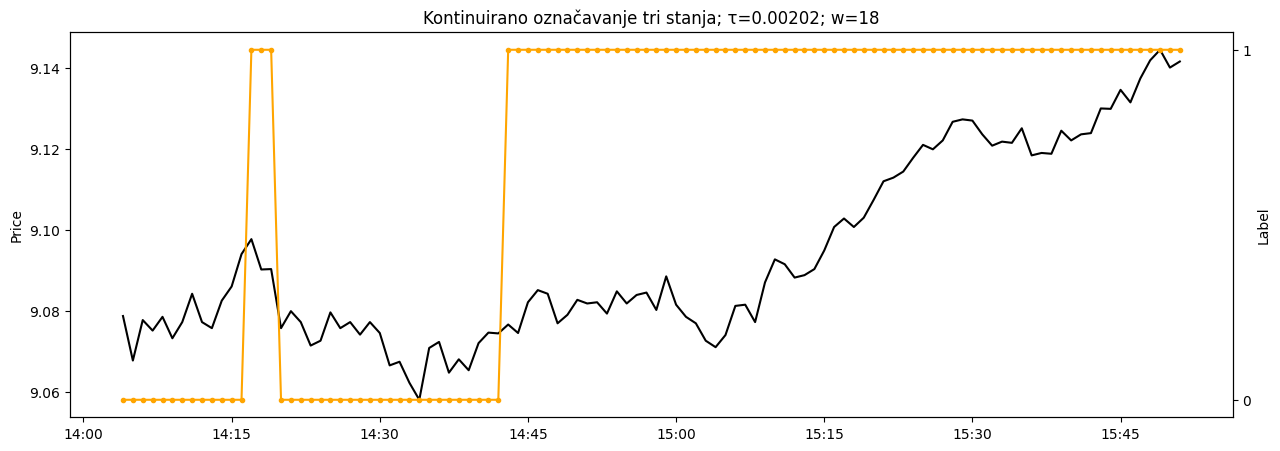

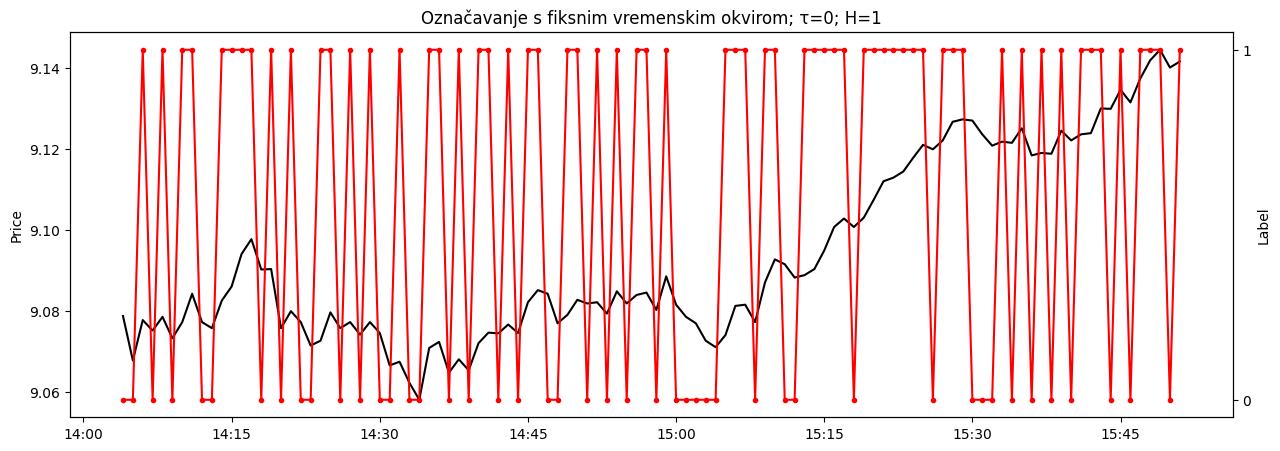

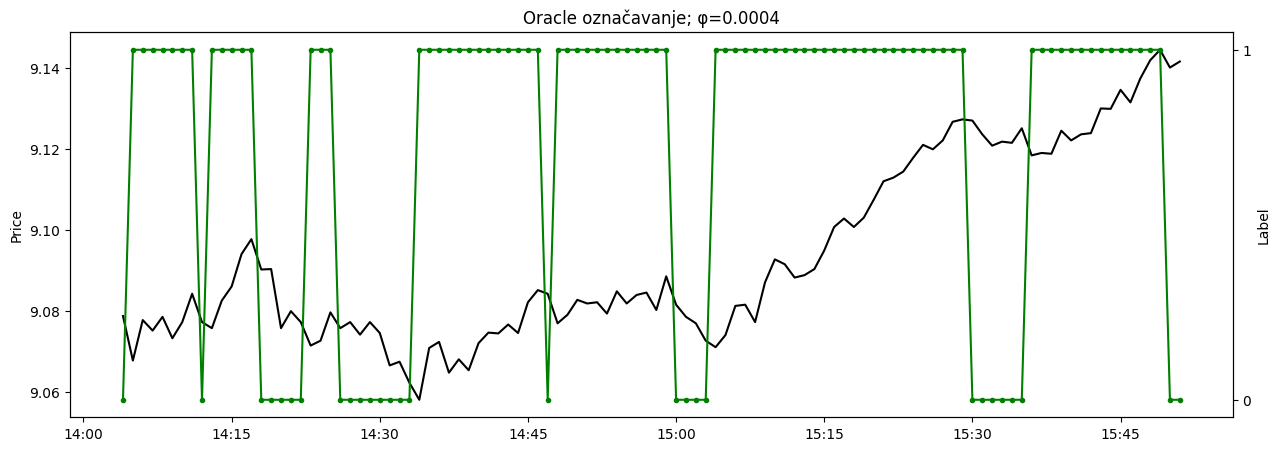

In [4]:
start_index = 352
end_index = 460
prices = raw_train_df['Close'].iloc[start_index:end_index]
labels_dict = {}
for label_name in labels_train_dict.keys():
    labels_dict[label_name] = labels_train_dict[label_name][start_index:end_index]

# plot_utils.plot_labels('Labels', prices, labels_dict)

# for label_key, label_series in labels_test_dict.items():
#     print(f"Count of unique values for {label_key}:")
#     print(label_series.value_counts())
    
tau_symbol = '\u03C4'
phi_symbol = '\u03C6'
label_utils.plot_labels(f'Kontinuirano označavanje dva stanja; {tau_symbol}=0.00094', prices, labels_dict['ct_two_state'], 'blue')
label_utils.plot_labels(f'Kontinuirano označavanje tri stanja; {tau_symbol}=0.00202; w=18', prices, labels_dict['ct_three_state'], 'orange')
label_utils.plot_labels(f'Označavanje s fiksnim vremenskim okvirom; {tau_symbol}=0; H=1', prices, labels_dict['fixed_time_horizon'], 'red')
label_utils.plot_labels(f'Oracle označavanje; {phi_symbol}=0.0004', prices, labels_dict['oracle'], 'green')

## Return Distribution

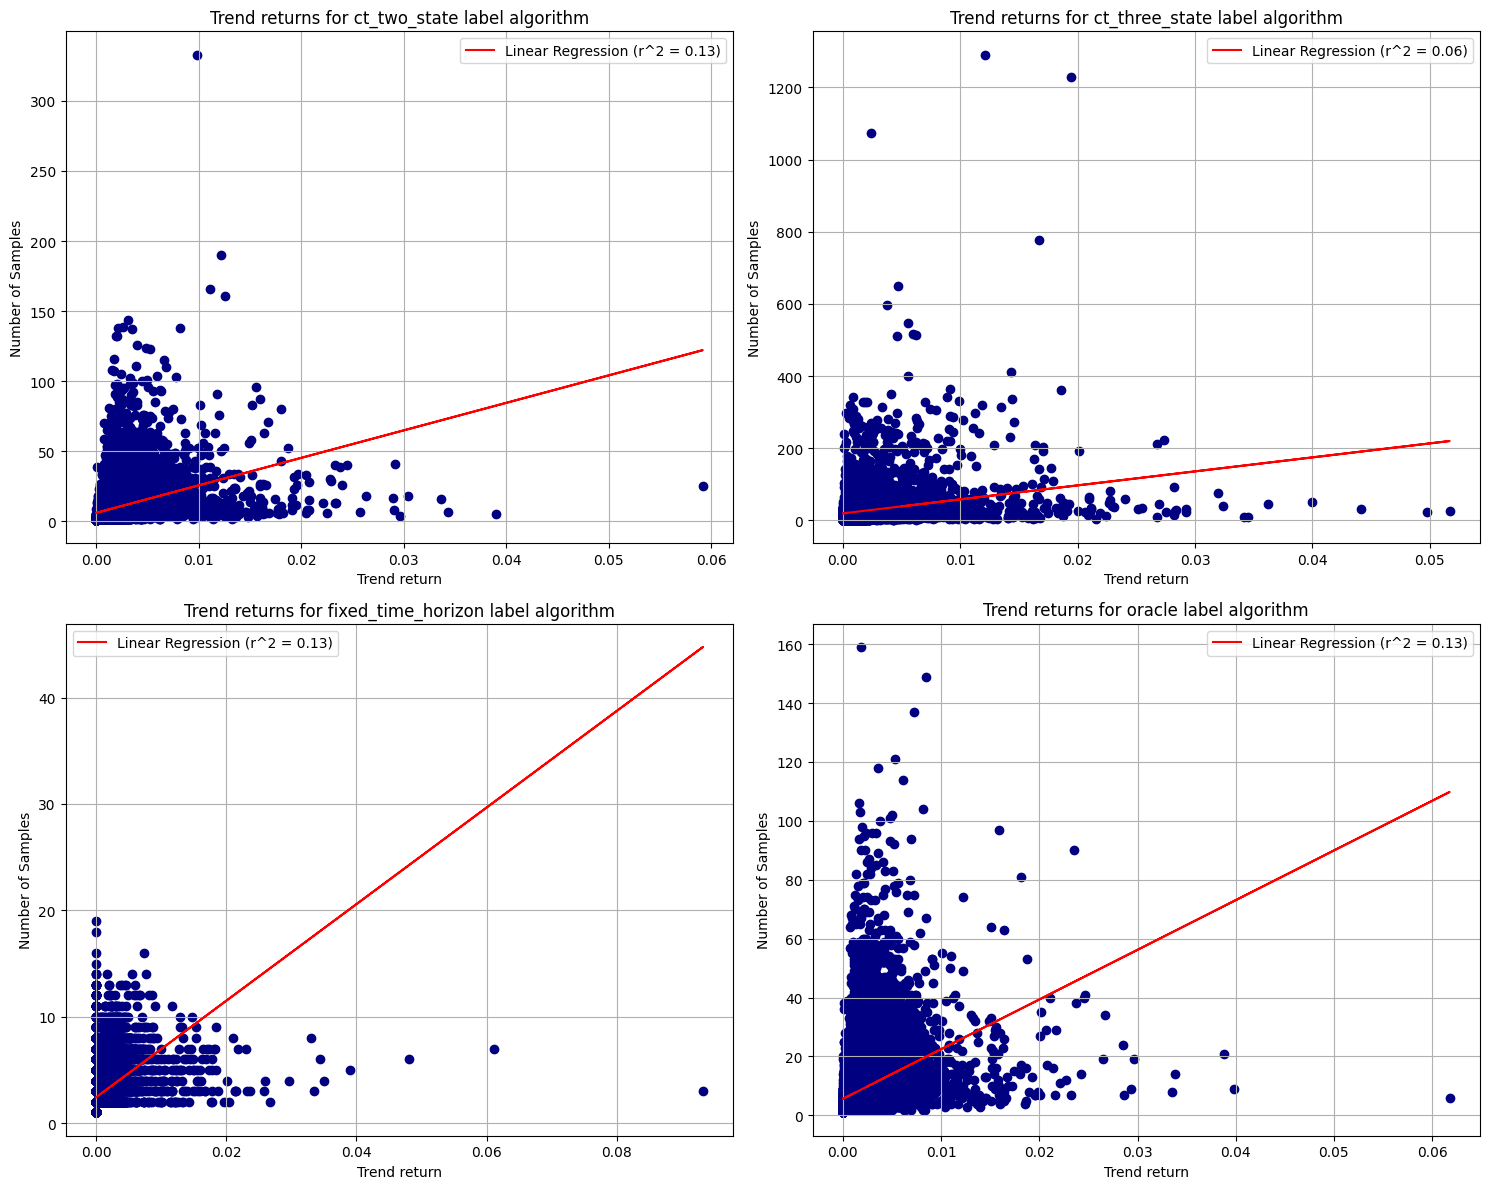

In [3]:
def compute_trend_absolute_returns(prices: pd.Series, labels: pd.Series) -> pd.Series:
    prices = prices[prices.index.isin(labels.index)]
    trend_returns = pd.Series(np.NaN, index=labels.index)
    
    trend_start_i = 0  # Start index of the trend

    for i, label in enumerate(labels.iloc[1:], start=1):
        if label != labels.iloc[trend_start_i] or i == len(labels) - 1:
            # End of the trend interval
            trend_end_i = i - 1 if label != labels.iloc[trend_start_i] else i
            # Calculate the absolute return for the trend interval
            absolute_return = abs(prices.iloc[trend_end_i] / prices.iloc[trend_start_i] - 1)
            for j in range(trend_start_i, trend_end_i + 1):
                trend_returns.iloc[j] = absolute_return
            trend_start_i = i  # Update the start of the new trend
    
    return trend_returns

title_list = []
returns_list = []
for label_name, label_series in labels_train_dict.items():
    if label_name == 'triple_barrier':
        continue
    returns_s = compute_trend_absolute_returns(feat_train_df['Close'], label_series)
    title_list.append(f'Trend returns for {label_name} label algorithm')
    returns_list.append(returns_s)
    
plot_utils.plot_value_occurrences_with_regression(title_list, returns_list, 'Trend return')

## Weight Plots

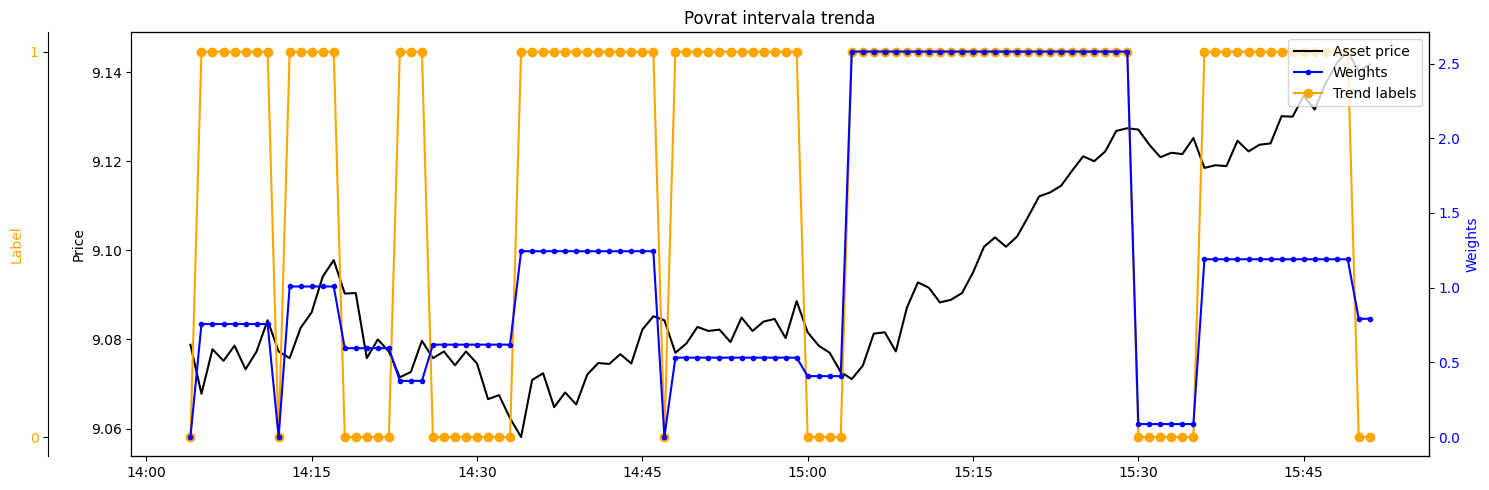

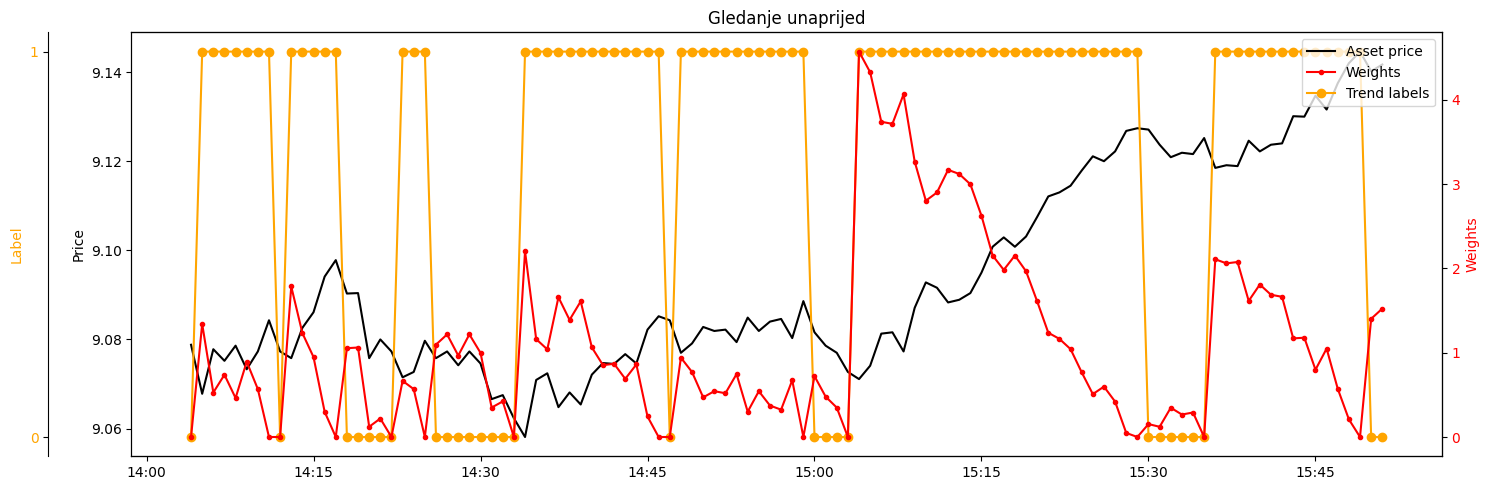

In [28]:
from weights import trend_interval_return
start_index = 352
end_index = 460
prices = raw_train_df['Close'].iloc[start_index:end_index]
labels = labels_train_dict['oracle'].iloc[start_index:end_index]
weights_dict = {}
for weight_alg, weights in weights_train_dict['oracle'].items():
    if weight_alg in ['trend_interval_return', 'forward_looking']:
        weights_dict[weight_alg] = weights.iloc[start_index:end_index]

_weights = weights_train_dict['oracle']['trend_interval_return'].iloc[start_index:end_index]
weight_utils.plot_weights('Povrat intervala trenda', prices, labels_dict['oracle'], _weights, 'blue')
_weights = weights_train_dict['oracle']['forward_looking'].iloc[start_index:end_index]
weight_utils.plot_weights('Gledanje unaprijed', prices, labels_dict['oracle'], _weights, 'red')

## Weights Distribution

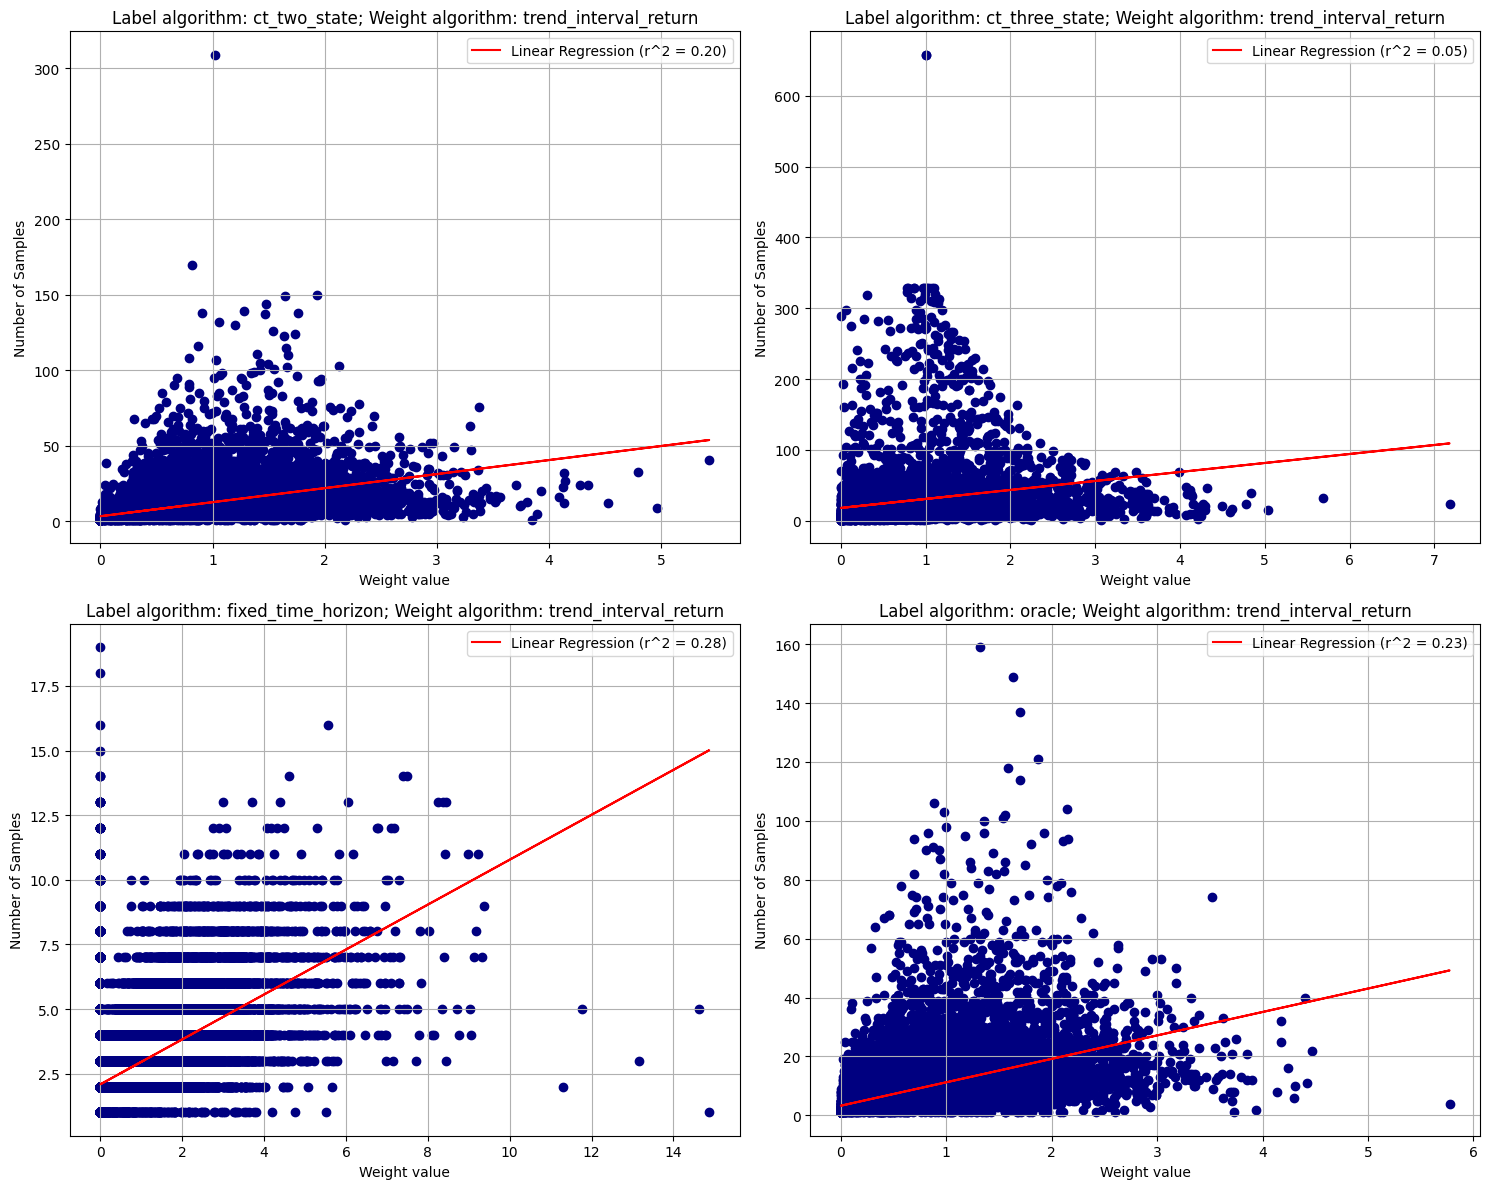

In [3]:
title_list = []
weights_list = []
for label_name, weights in weights_train_dict.items():
    if label_name == 'triple_barrier':
        continue
    title_list.append(f'Label algorithm: {label_name}; Weight algorithm: trend_interval_return')
    weights_list.append(weights['trend_interval_return'])

    
plot_utils.plot_value_occurrences_with_regression(title_list, weights_list, 'Weight value')

## Accuracy, AUC Tables

In [20]:
# Print table with results
with open('/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed/metrics.json', 'r') as file:
    metrics = json.load(file)

print('New tests with 150 epochs')
print('Train data: 2 years, Test data: 2 weeks')
plot_utils.print_highlighted_LW_table(metrics, 'Accuracy', 'accuracy', 'best_model_test')
plot_utils.print_highlighted_LW_table(metrics, 'AUC', 'auc', 'best_model_test')
plot_utils.print_highlighted_LW_table(metrics, 'Cumulative Return', 'cumulative_return', 'best_model_test')

New tests with 150 epochs
Train data: 2 years, Test data: 2 weeks
Table for Accuracy:
+--------------------+-----------+------------------------+----------------------------+-------------------------+----------------------+------------------------+
| Label              |   CB_none | none                   |   CB_trend_interval_return |   trend_interval_return |   CB_forward_looking | forward_looking        |
|--------------------+-----------+------------------------+----------------------------+-------------------------+----------------------+------------------------|
| ct_three_state     |  0.496489 | 0.7224287390708923     |                   0.810409 |                0.770343 |             0.765799 | **0.8261049389839172** |
| ct_two_state       |  0.490706 | **0.6505576372146606** |                   0.591491 |                0.62784  |             0.518381 | 0.5914911031723022     |
| fixed_time_horizon |  0.665014 | **0.674514651298523**  |                   0.584469 |           

In [12]:
# Print table with results
with open('/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed-repeated/metrics.json', 'r') as file:
    metrics = json.load(file)

print('New tests with 300 epochs')
plot_utils.print_highlighted_LW_table(metrics, 'Accuracy', 'accuracy', 'best_model_test')
plot_utils.print_highlighted_LW_table(metrics, 'AUC', 'auc', 'best_model_test')
plot_utils.print_highlighted_LW_table(metrics, 'Cumulative Return', 'cumulative_return', 'best_model_test')

New tests with 300 epochs
Table for Accuracy:
+--------------------+------------------------+------------------------+----------------------------+----------------------+
| Label              | CB_none                | none                   |   CB_trend_interval_return |   CB_forward_looking |
|--------------------+------------------------+------------------------+----------------------------+----------------------|
| ct_three_state     | 0.4964890480041504     | **0.836844265460968**  |                   0.793061 |             0.747212 |
| ct_two_state       | 0.49070632457733154    | **0.6650144457817078** |                   0.603057 |             0.626188 |
| fixed_time_horizon | **0.6757538318634033** | nan                    |                   0.591491 |           nan        |
| oracle             | **0.6303180456161499** | nan                    |                   0.57786  |           nan        |
+--------------------+------------------------+------------------------+-------

In [3]:
# Print table with results
with open('/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed-old_data/metrics.json', 'r') as file:
    metrics = json.load(file)

print('Old data tests with 150 epochs')
print('Train data: 3 years, Test data: 2 weeks')
plot_utils.print_highlighted_LW_table(metrics, 'Accuracy', 'accuracy', 'best_model_test')
plot_utils.print_highlighted_LW_table(metrics, 'AUC', 'auc', 'best_model_test')
plot_utils.print_highlighted_LW_table(metrics, 'Cumulative Return', 'cumulative_return', 'best_model_test')

Old data tests with 150 epochs
Train data: 3 years, Test data: 2 weeks
Table for Accuracy:
+--------------------+-----------+------------------------+----------------------------+-------------------------+------------------------+-------------------+
| Label              |   CB_none | none                   | CB_trend_interval_return   | trend_interval_return   | CB_forward_looking     |   forward_looking |
|--------------------+-----------+------------------------+----------------------------+-------------------------+------------------------+-------------------|
| ct_three_state     |  0.342007 | 0.8501858711242676     | 0.86208176612854           | 0.8446096777915955      | **0.8661710023880005** |          0.865427 |
| ct_two_state       |  0.393309 | 0.678438663482666      | **0.6802973747253418**     | 0.6334572434425354      | 0.6702602505683899     |          0.665428 |
| fixed_time_horizon |  0.704833 | **0.7074349522590637** | 0.5490706562995911         | 0.6197025775909424  

In [3]:
# Print table with results
with open('/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/2_years-1_fold/metrics.json', 'r') as file:
    metrics = json.load(file)

print('2_years-1_fold')
print('Train data: 3 years, Test data: 2 weeks')
plot_utils.print_highlighted_LW_table(metrics, 'Accuracy', 'accuracy', 'best_model_test')
plot_utils.print_highlighted_LW_table(metrics, 'AUC', 'auc', 'best_model_test')
plot_utils.print_highlighted_LW_table(metrics, 'Cumulative Return', 'cumulative_return', 'best_model_test')

2_years-1_fold
Train data: 3 years, Test data: 2 weeks
Table for Accuracy:
+--------------------+------------------------+------------------------+----------------------------+-------------------------+----------------------+-------------------+
| Label              | CB_none                | none                   |   CB_trend_interval_return |   trend_interval_return |   CB_forward_looking |   forward_looking |
|--------------------+------------------------+------------------------+----------------------------+-------------------------+----------------------+-------------------|
| ct_three_state     | 0.4964890480041504     | **0.8294093608856201** |                   0.812474 |                0.736059 |             0.752169 |          0.821148 |
| ct_two_state       | 0.49070632457733154    | **0.6633622646331787** |                   0.609665 |                0.620405 |             0.618753 |          0.58323  |
| fixed_time_horizon | **0.6836017966270447** | 0.6794713139533997    

In [6]:
# with open('/home/mdzaja/MasterThesis/tmp-combined.json', 'r') as file:
#     metrics = json.load(file)
# data_types = ['train_cv_mean', 'validation_cv_mean', 'best_model_train', 'best_model_test']
# plot_utils.plot_acc_auc(metrics, x_title='Accuracy', y_title='AUC', x_key='accuracy', y_key='auc', data_types=data_types)

In [6]:
from sklearn.metrics import roc_auc_score, accuracy_score

def calculate_metrics(probs, real_y):
    # Calculate AUC
    auc = roc_auc_score(real_y, probs)
    
    # Calculate accuracy
    # Note: probs are continuous probabilities and you need to convert them to binary predictions
    # Assuming 0.5 as the threshold for binary classification
    predictions = [1 if prob > 0.5 else 0 for prob in probs]
    accuracy = accuracy_score(real_y, predictions)
    
    return auc, accuracy

Ys = {}
for label_name in ["ct_two_state", "ct_three_state", "fixed_time_horizon", "oracle"]:
    labels = model_utils.load_labels('/home/mdzaja/MasterThesis/artifacts/assets/AAPL/labels/all_labels_test_1m_2012-11-21_2012-12-04.pkl', label_name)
    Ys[label_name] = model_utils.get_Y_or_W_day_separated(labels, 60)
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed/test_probs.pkl", 'rb') as file:
    probs_test_dict = pickle.load(file)
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed/test_probs_calibrated.pkl", 'rb') as file:
    probs_test_calibrated_dict = pickle.load(file)

test_metrics = {}
for model_name, model_dict in probs_test_dict.items():
    y = Ys[model_dict['label_name']]
    probs = model_dict['probs'].loc[y.index]
    auc, accuracy = calculate_metrics(probs, y)
    test_metrics[model_name] = {
        'test_basic': {
            'auc': auc,
            'accuracy': accuracy
        }
    }
print('Basic test')
plot_utils.print_highlighted_LW_table(test_metrics, 'Accuracy', 'accuracy', 'test_basic')
plot_utils.print_highlighted_LW_table(test_metrics, 'AUC', 'auc', 'test_basic')

test_metrics_calibrated = {}
for model_name, model_dict in probs_test_calibrated_dict.items():
    y = Ys[model_dict['label_name']]
    probs = model_dict['probs'].loc[y.index]
    auc, accuracy = calculate_metrics(probs, y)
    test_metrics_calibrated[model_name] = {
        'test_calibrated': {
            'auc': auc,
            'accuracy': accuracy
        }
    }
print('Calibrated test')
plot_utils.print_highlighted_LW_table(test_metrics_calibrated, 'Accuracy', 'accuracy', 'test_calibrated')
plot_utils.print_highlighted_LW_table(test_metrics_calibrated, 'AUC', 'auc', 'test_calibrated')

Basic test
Table for Accuracy:
+--------------------+-----------+------------------------+----------------------------+-------------------------+------------------------+-------------------+
| Label              |   CB_none | none                   |   CB_trend_interval_return | trend_interval_return   | CB_forward_looking     |   forward_looking |
|--------------------+-----------+------------------------+----------------------------+-------------------------+------------------------+-------------------|
| ct_three_state     |  0.516464 | 0.5454939341421143     |                   0.746101 | 0.6061525129982669      | **0.7820623916811091** |          0.765598 |
| ct_two_state       |  0.488735 | 0.6594454072790294     |                   0.649047 | **0.6785095320623917**  | 0.5099653379549394     |          0.643847 |
| fixed_time_horizon |  0.669411 | **0.6737435008665511** |                   0.587955 | 0.6048526863084922      | 0.5216637781629117     |          0.521664 |
| oracle 

## ROC AUC Curve Plots

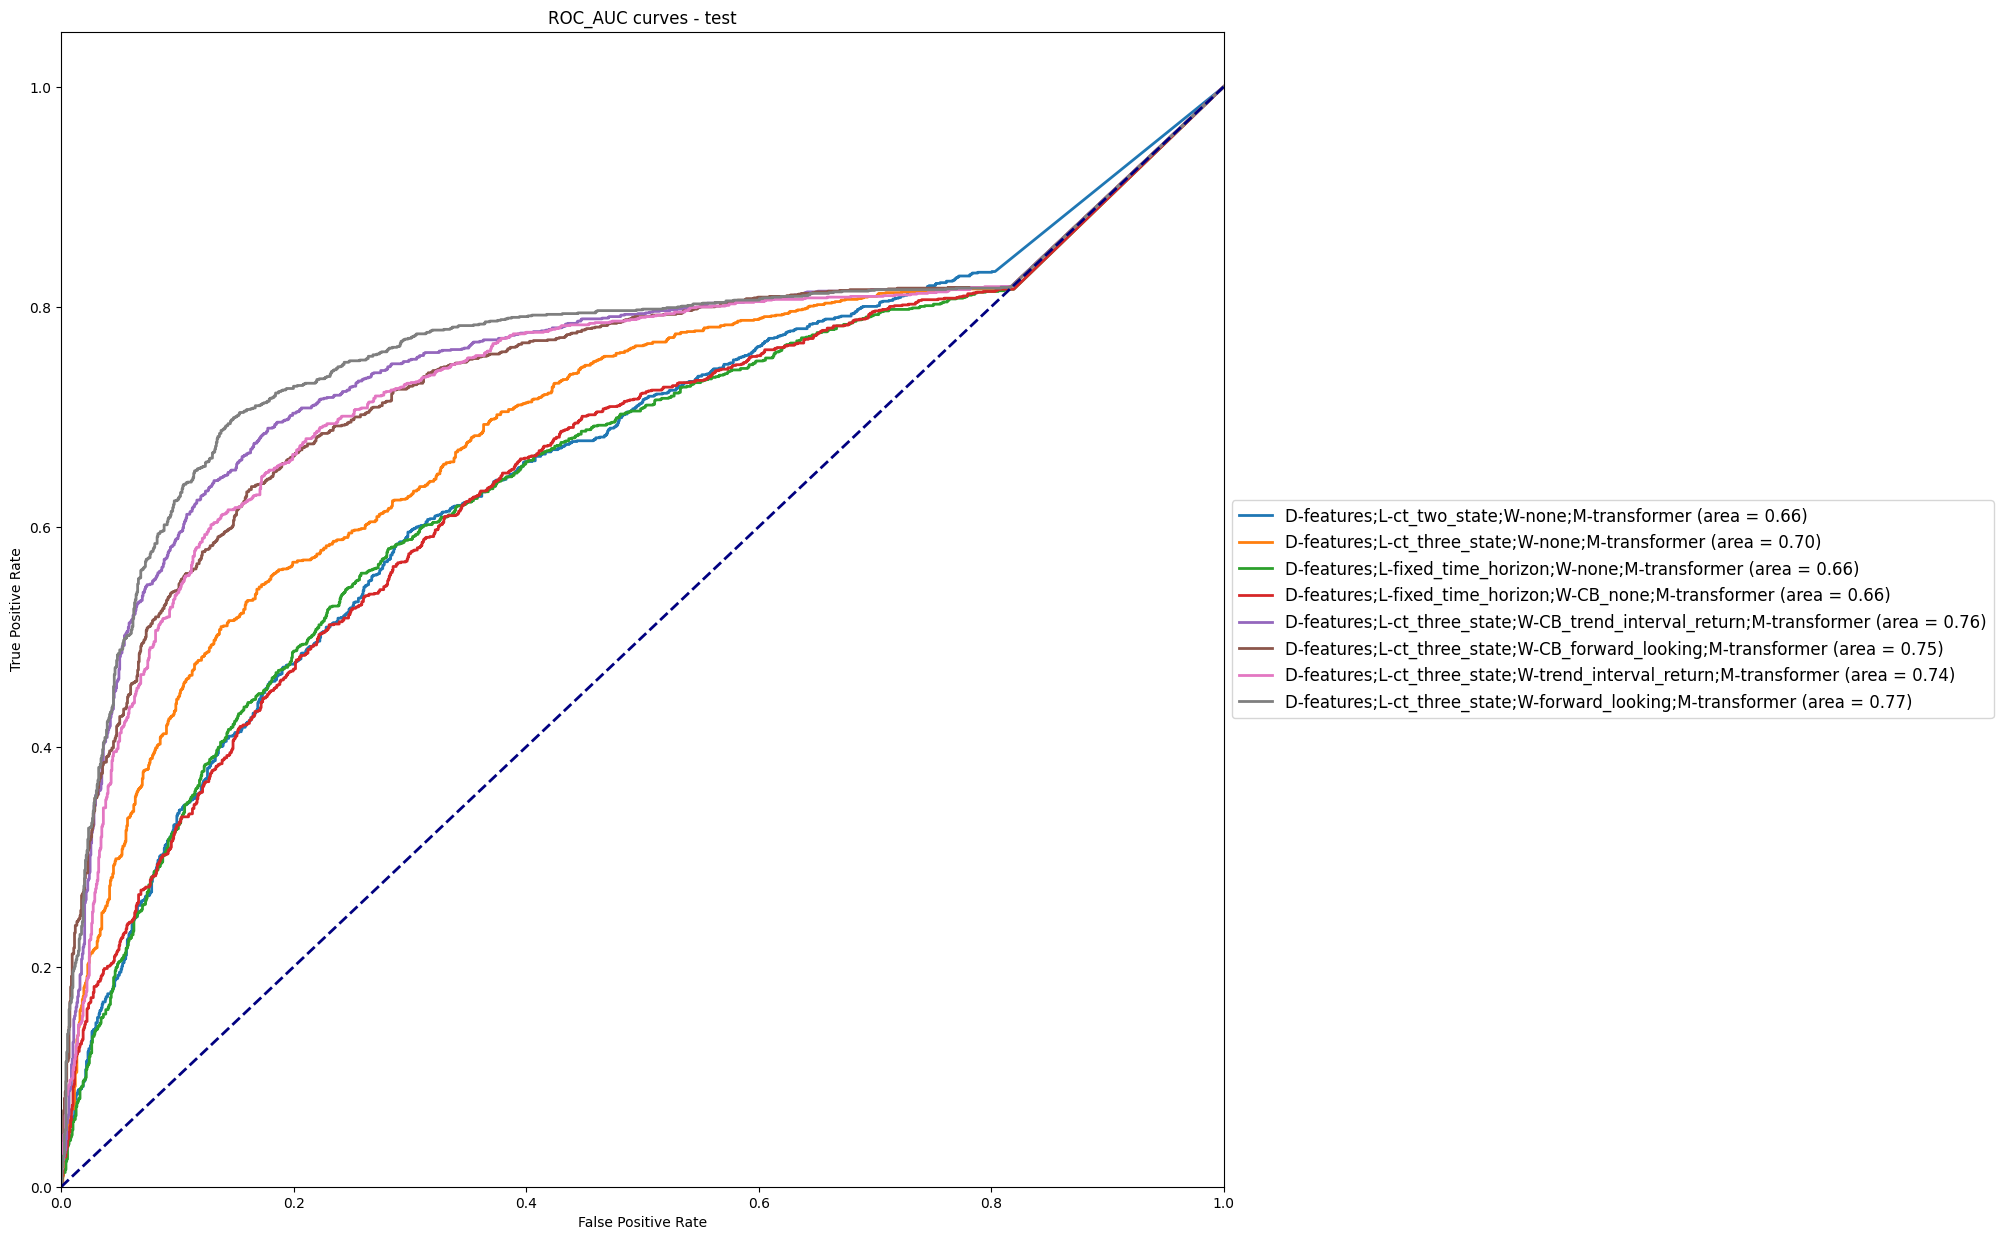

In [3]:
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed/test_probs.pkl", 'rb') as file:
    probs_test_dict = pickle.load(file)

plot_utils.plot_roc_auc_curves(labels_test_dict, probs_test_dict, 'ROC_AUC curves - test', exclude_auc_less_than=0.65)

## Isotonic Probability Calibration

2012-11-23 10:54:00 2012-11-23 12:41:00
2012-11-23 10:54:00 2012-11-23 12:41:00


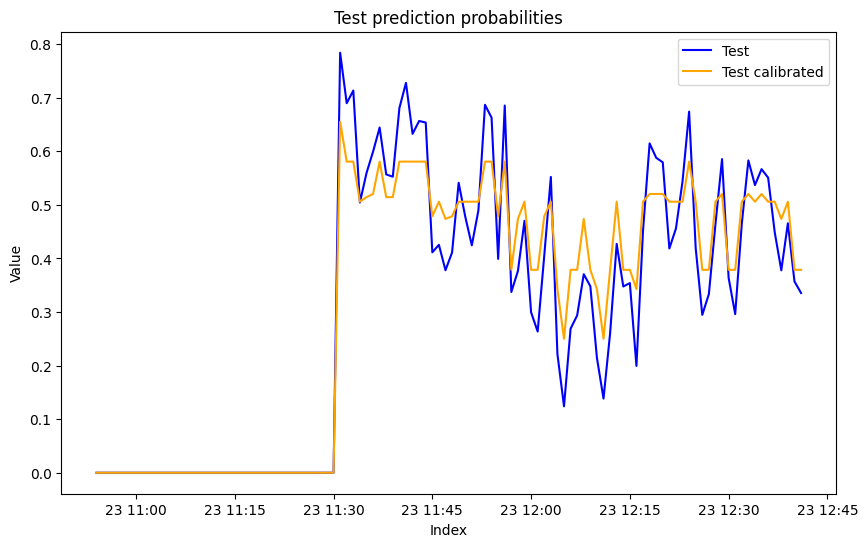

In [7]:
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed/test_probs.pkl", 'rb') as file:
    probs_test_dict = pickle.load(file)
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed/test_probs_calibrated.pkl", 'rb') as file:
    probs_test_calibrated_dict = pickle.load(file)

test = probs_test_dict['D-features;L-fixed_time_horizon;W-CB_trend_interval_return;M-transformer']['probs'].iloc[352:460]
test_calibrated = probs_test_calibrated_dict['D-features;L-fixed_time_horizon;W-CB_trend_interval_return;M-transformer']['probs'].iloc[352:460]
print(test.index[0], test.index[-1])
print(test_calibrated.index[0], test_calibrated.index[-1])

plot_utils.plot_series(test, test_calibrated, 'Test', 'Test calibrated', 'Test prediction probabilities')

## Backtest Results

In [4]:
# with open('/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed/metrics.json', 'r') as file:
#     metrics = json.load(file)
# data_types = ['best_model_test']
# plot_utils.print_highlighted_LW_table(metrics, 'Cummulative Return', 'cumulative_return', 'best_model_test')

data = model_utils.load_data("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/data/feat/test_1m_2012-11-21_2012-12-04.csv")

test_returns = {}
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed/test_probs.pkl", 'rb') as file:
    probs_test_dict = pickle.load(file)
for model_name, model_dict in probs_test_dict.items():
    bt_result = backtest_utils.do_backtest(data, model_dict['probs'])
    test_returns[model_name] = {
        'best_model_test': {
            'cumulative_return': bt_result['Return [%]'] / 100
        }
    }
plot_utils.print_highlighted_LW_table(test_returns, 'Basic Cummulative Return', 'cumulative_return', 'best_model_test')
    
test_calibrated_returns = {}
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed/test_probs_calibrated.pkl", 'rb') as file:
    probs_test_calibrated_dict = pickle.load(file)
for model_name, model_dict in probs_test_calibrated_dict.items():
    bt_result = backtest_utils.do_backtest(data, model_dict['probs'])
    test_calibrated_returns[model_name] = {
        'best_model_test': {
            'cumulative_return': bt_result['Return [%]'] / 100
        }
    }
plot_utils.print_highlighted_LW_table(test_calibrated_returns, 'Cummulative Return With Calibration', 'cumulative_return', 'best_model_test')

Table for Basic Cummulative Return:
+--------------------+-------------------------+------------+----------------------------+-------------------------+-------------------------+-------------------------+
| Label              | CB_none                 |       none |   CB_trend_interval_return |   trend_interval_return | CB_forward_looking      | forward_looking         |
|--------------------+-------------------------+------------+----------------------------+-------------------------+-------------------------+-------------------------|
| ct_three_state     | **0.03252483023200002** | -0.0132464 |                 -0.0355588 |             -0.00965457 | -0.026800348067995403   | -0.020151550007993138   |
| ct_two_state       | **0.0**                 | -0.0930582 |                 -0.0704265 |             -0.0840529  | -0.002284022059999188   | -0.08954835067198838    |
| fixed_time_horizon | -0.1901300669759763     | -0.207079  |                 -0.135622  |             -0.146574   | **